<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Numpy and Matplotlib - An Introduction
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Machine Learning 2021</b> <br>
    <b>Lab01.02 - 17/03/2021<br>
    Marco Cannici <br>
    <a href="mailto:marco.cannici@polimi.it">marco.cannici@polimi.it</a><br>
    </div>
    </td>
    <td width="100px"> 
        <a href="http://chrome.ws.dei.polimi.it/index.php?title=Machine_Learning_Bio">
        <img align="right", width="100px" src='https://chart.googleapis.com/chart?cht=qr&chl=chrome.ws.dei.polimi.it/index.php?title=Machine_Learning_Bio&chs=180x180&choe=UTF-8&chld=L|0' alt=''>
        </a>
    </td>
</tr>
</table>

NumPy is the fundamental package for **scientific computing** in Python.

Among many useful things, is contains:

- support for N-dimensional arrays
- support for matrix operations, linear algebra, etc...
- optimized implementations (mostly written in C, thus very fast!!)

It is commonly imported as `np`

In [3]:
import numpy as np

print(np.__version__)

# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1.18.1


# Arrays

The core of NumPy library are `array` objects. They are very similar to lists (also in the way you can select and slice them), but they have some advantages and limitations if compared to lists.

- They are *fast* (implemented in C)
- They support *additional slicing* operations
- They must contain elements of the same type

## - Simple array creation

The basic way of creating an array is through the `np.array` constructor (which supports multiple types of arguments):

In [4]:
# From list
list1d = [1, 2, 3]

arr1d = np.array(list1d)

type(arr1d)
arr1d

numpy.ndarray

array([1, 2, 3])

In [5]:
# From list of lists -> A 2D matrix
list2d = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

arr2d = np.array(list2d)

type(arr2d)
arr2d

numpy.ndarray

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

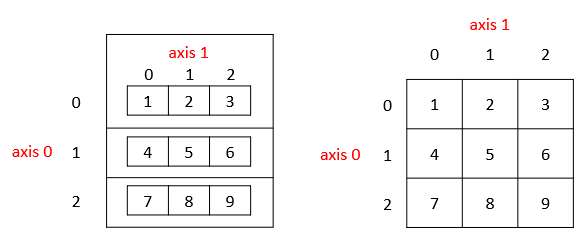

In NumPy we have the concept of **axis**, which identify the dimension on which operations are performed. Multi-dimensional array can be seen as arrays of arrays (as in C) where each dimension (or axis) represents an array containing elements (and possibly other arrays)

We must provide lists which are consistent with axis dimensions and types. If we don't provide consistent shapes, (or types), NumPy will fall back to creating arrays of type 'object'.

In [6]:
# Numpy will convert lists only if they are consistent with axis dimensions
# To have a properly defined array we MUST have elements having the same
# number of sub-elements in each axis
arr_obj = np.array([[0,1,2], [3,4], [6,7,8]])
arr_obj

# Numpy automatically converts to a common data type, if it is possible!
arr_obj = np.array([[0,1,2], [3,4,"5"], [6,7,8]])
arr_obj

# Otherwise it falls back to the 'object' type
arr_obj = np.array([[0,1,2], [3,4,print], [6,7,8]])
arr_obj

array([list([0, 1, 2]), list([3, 4]), list([6, 7, 8])], dtype=object)

array([['0', '1', '2'],
       ['3', '4', '5'],
       ['6', '7', '8']], dtype='<U11')

array([[0, 1, 2],
       [3, 4, <built-in function print>],
       [6, 7, 8]], dtype=object)

## - Array attributes

NumPy arrays are objects (of the python class `np.ndarray`) that provide useful attributes, characterizing their type and shape, and functions for manipulating them:

In [7]:
# dtype: type of the elements
print('datatype: %s' % arr2d.dtype)

# change type: 
# np.TYPE(array)
arr2d = np.float32(arr2d)
# or array.astype(TYPE)
arr2d = arr2d.astype(np.float32)

# shape: dimensions of the array
print('shape: ', arr2d.shape)

# ndim: number of dimensions of the array
print('num dimensions: {}'.format(arr2d.ndim))

# size: total number of elements
print('size:{}'.format(arr2d.size))

datatype: int32
shape:  (3, 3)
num dimensions: 2
size:9


## - Advanced array creation

On top of the basic `np.array` constructor, NumPy provides also some handy functions to create arrays with specific values:

In [8]:
# Create an array: many alternatives
# ----------------------------------

# Array of zeros
np.zeros(shape=[3, 3], dtype=np.int32)

# Array of ones
np.ones(shape=[3, 3], dtype=np.int32)

# Array containing sequence of numbers
# by step. NOTE: stop is exclusive!
np.arange(start=0, stop=10, step=1, dtype=np.int32)
# by number of elements. NOTE: stop is inclusive!
np.linspace(start=0, stop=9, num=10, dtype=np.int32)


array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## - Random

`np.random` constructors allow instead to create arrays which are automatically filled with random values, sampled from a specific distribution.

In [9]:
# Create an array: random values
# numpy.random
# ------------------------------

# Set the random seed of NumPy
# By doing that we fix the order in which
# random values are generated
np.random.seed(321)

# Uniform distribution over [0, 1)
# np.random.rand(d0, d1, ..., dn)
arr = np.random.rand(3, 3)
arr

# Normal distribution with mean=0 and variance=1
# np.random.randn(d0, d1, ..., dn)
arr = np.random.randn(3, 3)
arr

# Random integers over [low, high)
# np.random.randint(low=, high=, size=)
arr = np.random.randint(0, 10, size=10)
arr

array([[0.88594794, 0.07791236, 0.97964616],
       [0.24767146, 0.75288472, 0.52667564],
       [0.90755375, 0.8840703 , 0.08926896]])

array([[-2.13744069,  0.23707221, -0.58301549],
       [-1.20391428,  0.90616404, -0.79394278],
       [-0.93483976, -0.05118961,  0.87131238]])

array([2, 1, 1, 0, 4, 4, 3, 0, 3, 7])

Numpy also supports random selection, shuffling and slicing of tensors

## - Reshape

In [10]:
# 1D array: [1, 2, 3, 4, 5, 6, 7, 8, 9]
arr = np.arange(1, 10, dtype=np.int32)
arr

# Reshape into 2d
arr2d = np.reshape(arr, [3, 3])
arr2d.shape
# or 
arr2d = np.reshape(arr, [3, -1]) # infer the dimension automatically
arr2d.shape

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

(3, 3)

(3, 3)

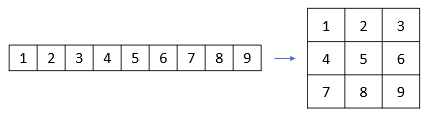

## - Adding / Removing dimensions

In [11]:
# Expand dimensions
# One-dimensional arrays have just one dimension in numpy
# i.e., they are not colum vector (nx1) nor row vector (1xn).
arr = np.arange(10)
arr.shape

arr.reshape(1,-1) # row vector
arr.reshape(-1,1) # colum vector

(10,)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [12]:
# example: from 3 x 3 to 3 x 3 x 1
# with np.reshape
arr = np.arange(9).reshape(3, 3)

expanded = np.reshape(arr, [3, 3, 1])
expanded.shape
# or with np.expand_dims()
expanded = np.expand_dims(arr, axis=-1)
expanded.shape

(3, 3, 1)

(3, 3, 1)

In [13]:
# Squeeze dimensions
# with np.reshape
squeezed = np.reshape(expanded, [3, 3])
squeezed.shape
# or with np.squeeze()
squeezed = np.squeeze(expanded, axis=-1)
squeezed.shape

(3, 3)

(3, 3)

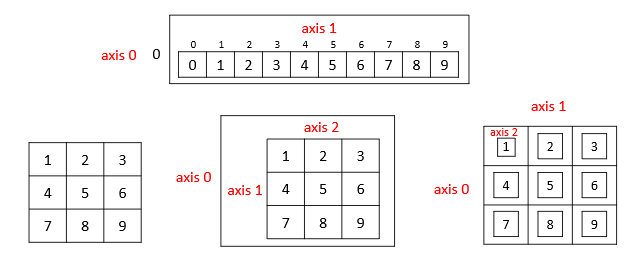

## - Math reduce operations

NumPy supports simple math operations that operate on the array by reducing one or multiple dimensions

In [14]:
# 1D array: [1, 2, 3, 4, 5, 6, 7, 8, 9]
arr = np.arange(1, 10, dtype=np.int32)
arr

# Compute min, max and mean
amin = arr.min()
amax = arr.max()
amean = arr.mean()

print("Min value in {}: {}".format(arr, arr.min()))
print("Max value in {}: {}".format(arr, arr.max()))
print("Mean value in {}: {}".format(arr, arr.mean()))

# 2D array
arr = np.random.permutation(arr).reshape([3, 3])
arr 

# Compute max along first axis
# NOTE: the specified axis is the 
# one reduced during the operation
max1 = np.max(arr, axis=0)
print("Max value over first axis: ", max1)
# Compute max along second axis
max2 = np.max(arr, axis=1)
print("Max value over second axis: {}".format(max2))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Min value in [1 2 3 4 5 6 7 8 9]: 1
Max value in [1 2 3 4 5 6 7 8 9]: 9
Mean value in [1 2 3 4 5 6 7 8 9]: 5.0


array([[9, 2, 3],
       [8, 1, 7],
       [6, 4, 5]])

Max value over first axis:  [9 4 7]
Max value over second axis: [9 8 6]


## Element-wise operations

Operations that are commonly defined betwenn scalars, if applied on an array and a scalar value, in NumPy operates as element-wise operations. That is, the operation with the scalar is applied on each element independently.

In [15]:
# Element-wise operations
# -----------------------
arr = np.arange(1, 10).reshape(3, 3)
arr

# *, +, -, /
arr * 2
arr + 2
arr - 2
arr / 2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([[-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ],
       [3.5, 4. , 4.5]])

## - Matrix operations

In [16]:
# Compute the transpose
arr = np.arange(1, 10).reshape([3, 3])
arr.T

# Matrix multiplication
ones2d = np.ones([3, 3])  # 3 x 3 matrix of ones

# |1 2 3|   |1 1 1|
# |4 5 6| * |1 1 1|
# |7 8 9|   |1 1 1|
np.dot(arr2d, ones2d)
arr2d @ ones2d

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

array([[ 6.,  6.,  6.],
       [15., 15., 15.],
       [24., 24., 24.]])

array([[ 6.,  6.,  6.],
       [15., 15., 15.],
       [24., 24., 24.]])

If operations are applied between two arrays of the same shape, the operation is applied element by element, independently (e.g. $A + B = C$ where $c_{ij} = a_{ij}+b_{ij}$).

In [17]:
# Multiply arrays
identity2d = np.eye(3, 3)  # 3 x 3 identity matrix

# |1 2 3|   |1 0 0|
# |4 5 6| * |0 1 0|
# |7 8 9|   |0 0 1|
arr2d * identity2d

array([[1., 0., 0.],
       [0., 5., 0.],
       [0., 0., 9.]])

If dimensions don't match, NumPy tries to make them match by replicating values along axis having one dimensions. The operations is memory optimized, meaning that replicated values are only "virtually" copied since they do not take space in memory!

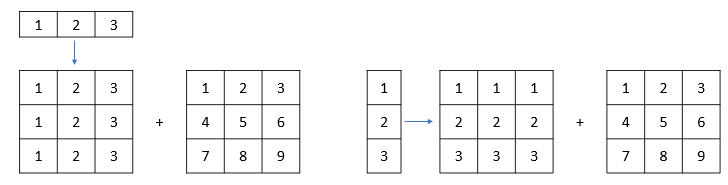

In [18]:
mat = np.arange(1, 10).reshape([3, 3])
arr = np.array([1, 2, 3]).reshape([1,3])
# First expand arr from shape [1,3] to shape [3,3]
# by replicating the rows, then sum
arr+mat

arr = arr.reshape([3,1])
# First expand arr from shape [3,1] to shape [3,3]
# by replicating the columns, then sum
arr+mat

array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12]])

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

# Indexing

With indexing we usually refer to the operation of selecting one or more elements from an array. If the indexing operation extracts elements from the array we usually call it 'slicing'. 

NumPy supports all the standard Python indexing syntax and also advanced ones. Since they are quite powerful and optimized, NumPy arrays are often used in place of standard lists just for this feature.

Few important information to keep in mind:
- Indexing starts from 0
- Use '[ ]' as indexing operator

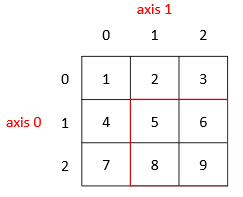

In [19]:
# Slicing
# -------
arr = np.arange(1, 10).reshape([3, 3])

#    0 1 2
# 0 |1 2 3|
# 1 |4 5 6|
# 2 |7 8 9|

# Get a single element: array[idx1, idx2, ..., idxN]
# e.g. get element '3'
arr[0, 2]
arr[0, -1]
arr[-3, -1]

# Get a slice: array[startidx1:endidx1:step1,..., startidxN:endidxN:stepN] (endidx excluded)
#          |5 6| 
# e.g. get |8 9| submatrix
arr[1:3:1, 1:3:1]
arr[1:3, 1:3]
arr[1:, 1:]

# Missing indices are considered complete slices
# e.g. get first row
arr[0, :]

# Negative indexes are accepted
arr[0:-1, 0]

# Reverse rows
# e.g. get first row reversed
arr[0, ::-1]


3

3

3

array([[5, 6],
       [8, 9]])

array([[5, 6],
       [8, 9]])

array([[5, 6],
       [8, 9]])

array([1, 2, 3])

array([1, 4])

array([3, 2, 1])

## Fancy Slicing

This type of slicing operation is not supported on standard Python lists (from here the "fancy" name), but is very useful and used very often. It allows one to select multiple elements at a time by providing the indices (i.e., multiple lists, of for each axis) specifying the positions of the element to extract.

In [20]:
# Slicing with lists
# arr[[a1, a2, ..., aN],[b1, b2, ..., bN], ..., [z1, z2, ..., zN]]

arr = np.arange(1, 17).reshape([4, 4])

#    0  1  2  3
# 0 |1  2  3  4 |
# 1 |5  6  7  8 |
# 2 |9  10 11 12|
# 3 |13 14 15 16|

# e.g. get the first diagonal
arr[[0, 1, 2, 3], [0, 1, 2, 3]]

array([ 1,  6, 11, 16])

A similar slicing mode uses boolean masks to select elements. Boolean masks are arrays having the same shape of the array from which elements have to be selected, and having a `True` value in correspondence of an element to be extracted, and a `False` value otherwise.

In [21]:
# Slicing with condition

arr = np.arange(1, 17).reshape([4, 4])

#    0  1  2  3
# 0 |1  2  3  4 |
# 1 |5  6  7  8 |
# 2 |9  10 11 12|
# 3 |13 14 15 16|

# e.g., find the indexes of even numbers
# with np.where()
indices = np.where(arr % 2 == 0)
indices
# replace even numbers with the value 10
arr[indices] = 10
arr
# with boolean mask
mask = arr != 10
mask
arr[mask] = 100
arr

(array([0, 0, 1, 1, 2, 2, 3, 3], dtype=int64),
 array([1, 3, 1, 3, 1, 3, 1, 3], dtype=int64))

array([[ 1, 10,  3, 10],
       [ 5, 10,  7, 10],
       [ 9, 10, 11, 10],
       [13, 10, 15, 10]])

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [ True, False,  True, False]])

array([[100,  10, 100,  10],
       [100,  10, 100,  10],
       [100,  10, 100,  10],
       [100,  10, 100,  10]])

## Concatenation and stacking
 
They are operations that can be used to merge / combine multiple arrays into a unique final array.

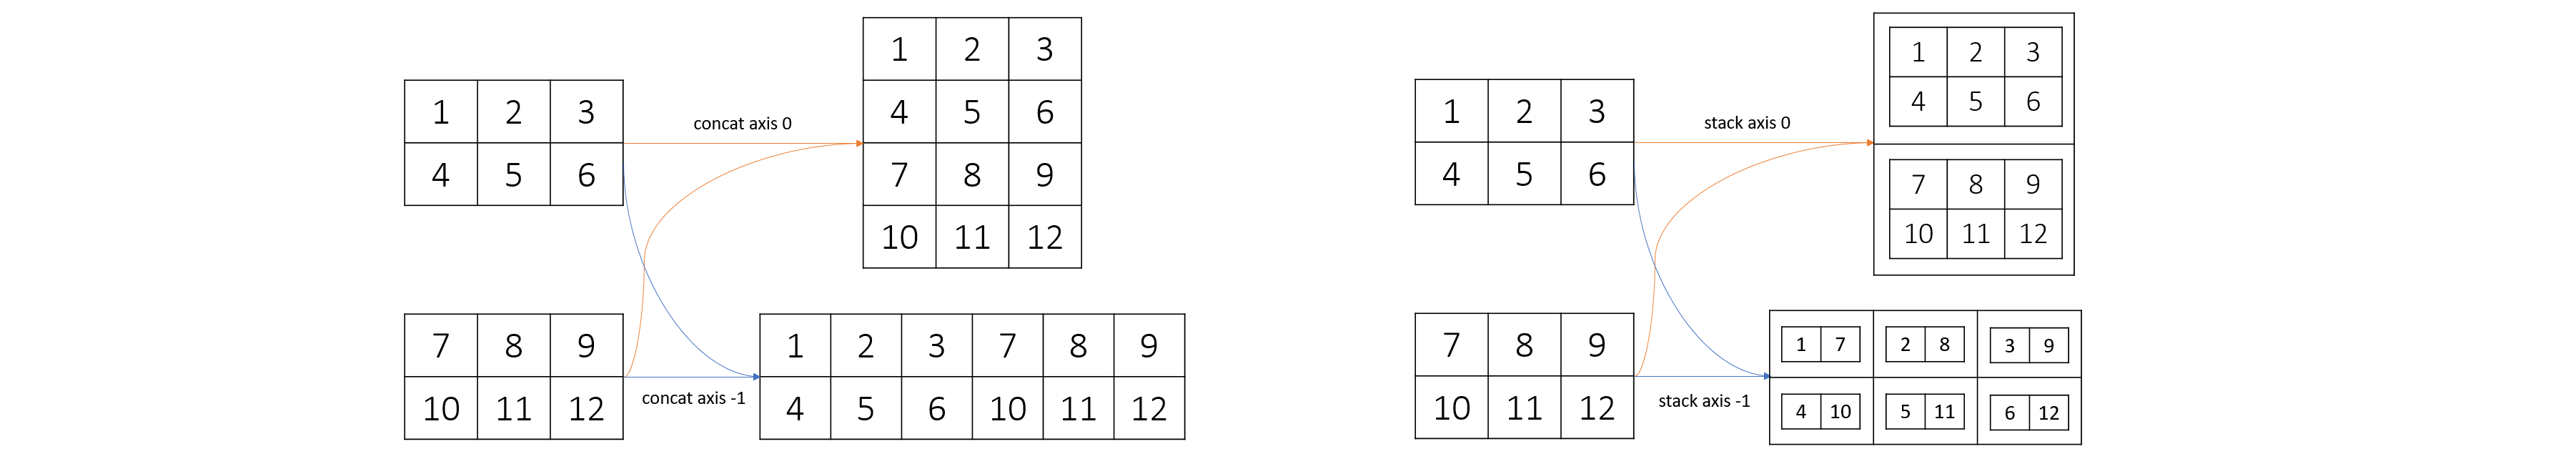

### Concatenation

Append one array after the other on a specific dimension.
 
- Can only be performed on arrays having the same number of axis
- All the axis must have the same number of elements except the axis on which the concatenation is performed.

If we start from two arrays of shape `[A,B,C,N1]` and `[A,B,C,N2]` and we perform concatenation on the last axis <br/>
-> we obtain a new array of shape `[A,B,C,N1+N2]` where elements in the last axis are concatenated


In [46]:
# Concatenation
# -------------
arr1 = np.arange(1, 4)
arr2 = np.arange(4, 7)

# [3] + [3] -> [6]
axis_0 = np.concatenate([arr1, arr2], axis=0)
axis_0

arr1 = np.arange(1, 7).reshape(2,3)
arr2 = np.arange(7, 13).reshape(2,3)

# [2,3] + [2,3] -> [4,3]
axis_0 = np.concatenate([arr1, arr2], axis=0)
axis_0
axis_0.shape

# [2,3] + [2,3] -> [2,6]
axis_1 = np.concatenate([arr1, arr2], axis=1)
axis_1
axis_1.shape

array([1, 2, 3, 4, 5, 6])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

(4, 3)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

(2, 6)

### Stacking

Merge two arrays togheter on **a new dimension**.

- Can only be applied to arryas having the same number of dimensions and the same number of elements in each dimension

If we start from two arrays of shape `[A,B,C,D]` and `[A,B,C,D]` and we perform stacking on the last axis <br/>
-> we obtain an array with **a new axis** in the last position (with number of elements equal to the number of arrays merged)<br/> -> `[A,B,C,D,2]`

In [45]:
arr1 = np.arange(1, 5)
arr2 = np.arange(5, 8)
arr1.shape, arr2.shape

((4,), (3,))

In [52]:
# Stacking
# -------------
arr1 = np.arange(1, 4)
arr2 = np.arange(4, 7)

# [3] + [3] -> [2,3]
axis_0 = np.stack([arr1, arr2], axis=0)
axis_0

# [3] + [3] -> [3,2]
axis_1 = np.stack([arr1, arr2], axis=-1)
axis_1

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [59]:
# Stacking
# -------------
arr1 = np.arange(1, 4)
arr2 = np.arange(4, 7)

# [3] + [3] -> [2,3]
axis_0 = np.stack([arr1, arr2], axis=0)
axis_0

# [3] + [3] -> [3,2]
axis_1 = np.stack([arr1, arr2], axis=1)
axis_1

arr1 = np.arange(1, 7).reshape(2,3)
arr2 = np.arange(7, 13).reshape(2,3)

# [2,3] + [2,3] -> [2,2,3]
axis_0 = np.stack([arr1, arr2], axis=0)
axis_0
axis_0.shape

# [2,3] + [2,3] -> [2,6]
axis_1 = np.stack([arr1, arr2], axis=-1)
axis_1
axis_1.shape

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

(2, 2, 3)

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

(2, 3, 2)

<br><br><br>


# Data Visualization with Matplotlib

Matplotlib is a **multi-platform** data visualization library **built on Numpy** arrays.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.

Which means **you can count on it to work regardless of which operating system you are using or which output format you wish.**

### Importing Matplotlib

Similarly to Numpy, it is common to import Matplotlib, and specifically the ``pyplot`` subpackage, as ``plt``

In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will create *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will create *static* images of your plot embedded in the notebook

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

## How to display a plot

Splots are mainly created using the ``plt.plot()`` method. Let's check its documentation:

In [39]:
plt.plot?

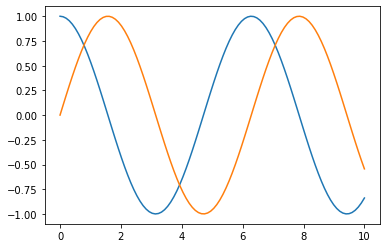

In [40]:
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))

### Line Colors

The ``plt.plot()`` function takes additional optional arguments that allow to specify the style that has to be used when plotting a line. 

The ``color`` argument allows to set a specific color. If no color is specified, Matplotlib will automatically cycle through a list of predefined colors.

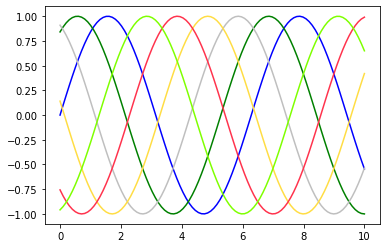

In [41]:
colors = ['blue', 'g', '0.75', # Grayscale between 0 and 1
          '#FFDD44',           # Hex code (RRGGBB from 00 to FF)
          (1.0,0.2,0.3),       # RGB tuple, values 0 to 1
          'chartreuse']        # all HTML color names supported

# Display sin function with different colors
for i, col in enumerate(colors):
    plt.plot(x, np.sin(x + i), color=col)

### Line Styles

Similarly, we can also specify the line style that has to be used by using the ``linestyle`` additional argument.

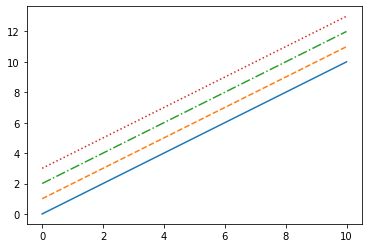

In [42]:
styles = ['solid', 'dashed', 'dashdot', 'dotted']
# Create parallel lines with different styles
for i, sty in enumerate(styles):
    plt.plot(x, x + i, linestyle=sty)

# For short, you can use the following codes
styles_short = ['-', '--', '-.', ':']
# for i, sty in enumerate(styles_short):
#     plt.plot(x, x + i + len(styles), linestyle=sty)

### Combine lines and colors

We can also combine colors and lines together to further personalize drawings. This can be done by specifying a style string as third argument.

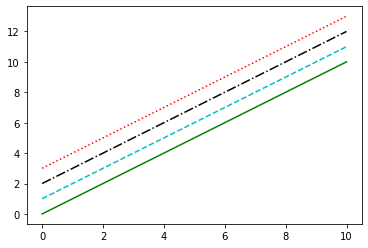

In [43]:
styles = ['-g', '--c', '-.k', ':r']
for i, sty in enumerate(styles):
    plt.plot(x, x + i, sty)

### Scatter plots

Another commonly used type of plot is the scatter plot, where points are not connected with a continuous line but displayed indivisually as dots, circles or other shapes. As in the previous cases, we can use the style string to specify which of the multiple scatter plot styles has to be used.

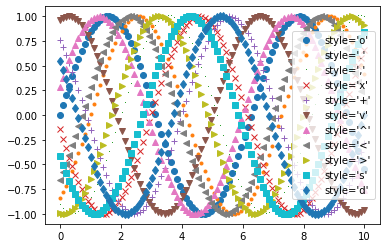

In [46]:
markers = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

# Print sin fnctions with
# different styles and labels
for i, stylestr in enumerate(markers):
    plt.plot(x, np.sin(x - i), stylestr,
             label="style='%s'" % stylestr)
# Show the legend
plt.legend(numpoints=1)

You can also use `plt.scatter`, that works similarly to `plt.plot` but that will automatically use `'o'` markers by default

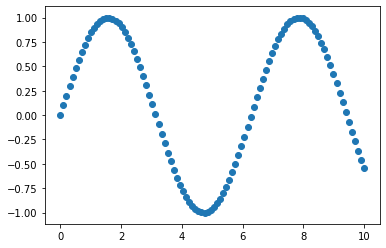

In [125]:
plt.scatter(x, np.sin(x))

### Adding labels and legends

Matplotlib offers a quick way to set titles, axis labels, and line legends.

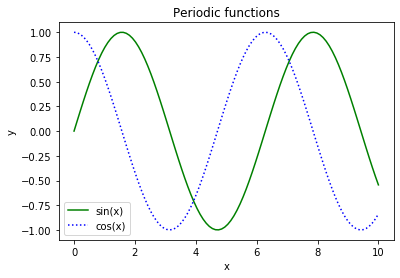

In [47]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.title("Periodic functions")
plt.xlabel("x")
plt.ylabel("y");

plt.legend();